<a href="https://colab.research.google.com/github/rmattoali/Image-classification-system/blob/main/Image_classification_fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Richard Mattoali

In [1]:
!pip install tensorflow

In [2]:
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# File path and extract into /tmp
zip_path = '/content/drive/MyDrive/Image_classification_fruits/fruits.zip'  # drive path
zip_ref = zipfile.ZipFile(zip_path, 'r')
zip_ref.extractall('./fruits')   # unzip path
zip_ref.close()

Mounted at /content/drive


In [4]:
# File directory
train_dir = './fruits/data/train'
test_dir = './fruits/data/test'

# Image size, batch size, train & test step per epoch
img_size = 64, 64  # Original size is 100x100
# b_size = 16
# train_step = 377   # train_step = Number of images / b_size
# test_step = 42     # test_step = Number of images / b_size

b_size = 32
train_step = 189
test_step = 21

# Train generator
train_datagen = ImageDataGenerator(rescale=1/255.0)

# train_datagen = ImageDataGenerator(
#     rescale=1/255.0,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
#     )

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=b_size,
    class_mode='categorical'  # For multi-class classification
)

# Test generator
test_datagen = ImageDataGenerator(rescale=1/255.0)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=b_size,
    class_mode='categorical'  # For multi-class classification
)


Found 6024 images belonging to 14 classes.
Found 663 images belonging to 14 classes.


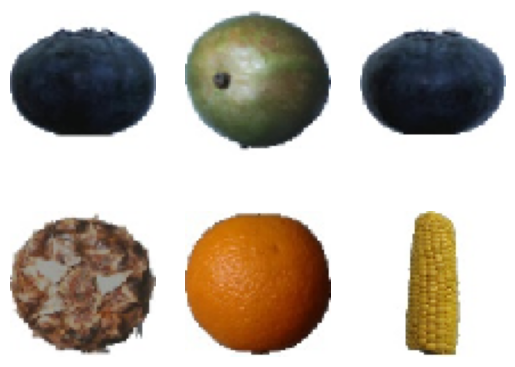

In [5]:
# Display some images from the train set
for images, labels in train_generator:
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.show()
    break

/tmp/ipython-input-482764769.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Image Count', data=class_df, palette='inferno')


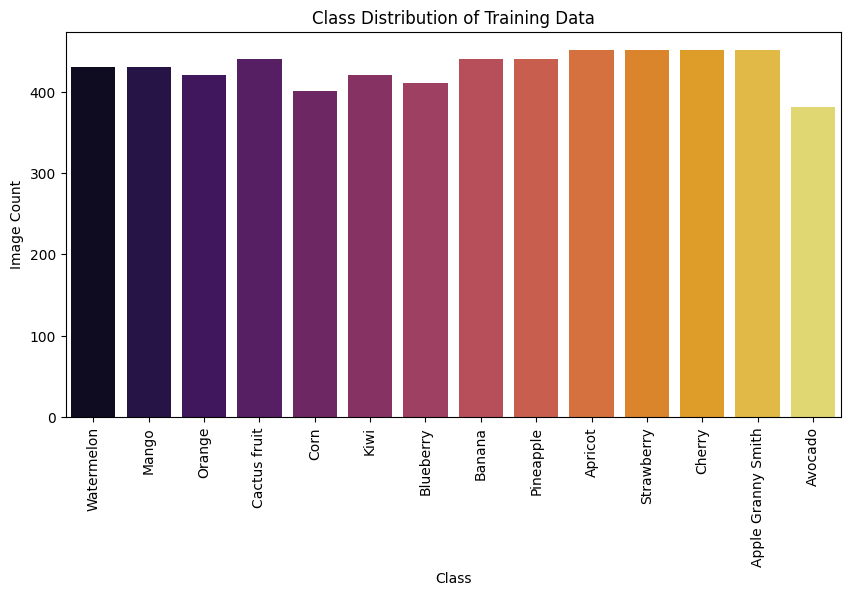

In [6]:
# Counting the number of images per class
class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path): # Ensure it's a directory
        class_counts[class_name] = len(os.listdir(class_path))

class_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Image Count'])

# Display the class distribution using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='Class', y='Image Count', data=class_df, palette='inferno')
plt.title("Class Distribution of Training Data")
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [7]:
# 1st test
model_1= tf.keras.models.Sequential([

    # 1st Convolutional Block
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 3rd Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # Flatten & Dense Layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),  # Prevent overfitting
    tf.keras.layers.Dense(14, activation='softmax')  # 14 fruit classes
])

model_1.summary()

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │        14,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,222 (71.18 KB)

 Trainable params: 18,142 (70.87 KB)

 Non-trainable params: 80 (320.00 B)

In [8]:
# 2nd test
model_2= tf.keras.models.Sequential([

    # 1st Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 3rd Convolutional Block
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # Flatten & Dense Layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),  # Prevent overfitting
    tf.keras.layers.Dense(14, activation='softmax')  # 14 fruit classes
])

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │        28,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,342 (169.30 KB)

 Trainable params: 43,182 (168.68 KB)

 Non-trainable params: 160 (640.00 B)

In [9]:
# 3rd test
model_3= tf.keras.models.Sequential([

    # 1st Convolutional Block
    tf.keras.layers.Conv2D(8, (5,5), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 3rd Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # Flatten & Dense Layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),  # Prevent overfitting
    tf.keras.layers.Dense(14, activation='softmax')  # 14 fruit classes
])

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 8)      │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 16)       │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │        14,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,606 (72.68 KB)

 Trainable params: 18,526 (72.37 KB)

 Non-trainable params: 80 (320.00 B)

In [10]:
# 4th test
model_4= tf.keras.models.Sequential([

    # 1st Convolutional Block
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(img_size[0], img_size[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # 2nd Convolutional Block
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    # Flatten & Dense Layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),  # Prevent overfitting
    tf.keras.layers.Dense(14, activation='softmax')  # 14 fruit classes
])

model_4.summary()

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 8)      │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │        57,358 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,846 (229.87 KB)

 Trainable params: 58,798 (229.68 KB)

 Non-trainable params: 48 (192.00 B)

In [11]:
# Fitting the mode using the name 'history'
# Model 4 i deemed most suitable from test (less resources with good accuracy)
history = model_4.fit(
    train_generator,
    steps_per_epoch=train_step,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_step,
    verbose=1)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 22s 104ms/step - accuracy: 0.7998 - loss: 0.7040 - val_accuracy: 0.4284 - val_loss: 2.1484
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9984 - loss: 0.0102 - val_accuracy: 0.9774 - val_loss: 0.0792
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 116ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 105ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 6.5389e-04


In [15]:
# Plot the loss and accuracy using the history object

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print (len(acc), len(val_acc), len(loss), len(val_loss))

5 5 5 5


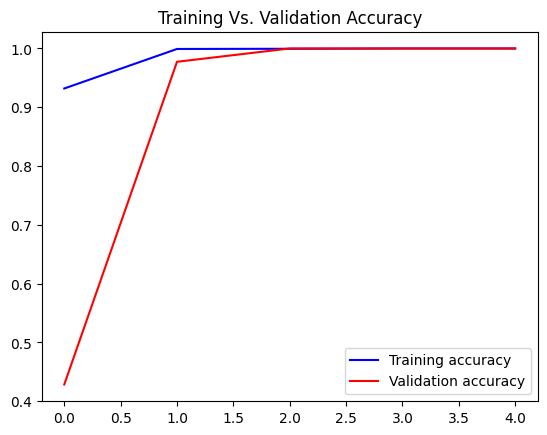

In [14]:
epochs = range(0,5) # adjust accroding to the number of epoch

# Plot training vs validation accuracy

plt.plot(epochs,acc,'b',label = 'Training accuracy')
plt.plot(epochs,val_acc,'r',label = 'Validation accuracy')
plt.title("Training Vs. Validation Accuracy")
plt.legend()
plt.show()


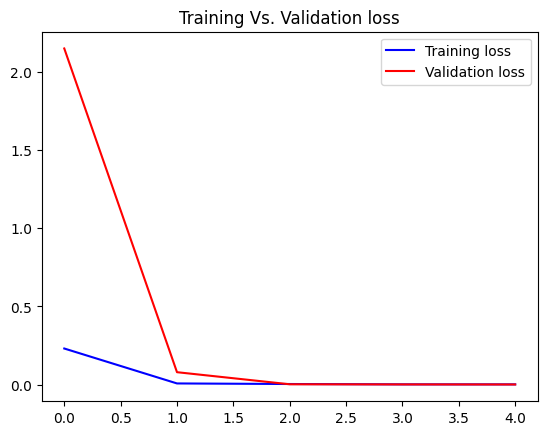

In [16]:
# Plot Training vs. Validation loss


plt.plot(epochs,loss,'b',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title("Training Vs. Validation loss")
plt.legend()
plt.show()

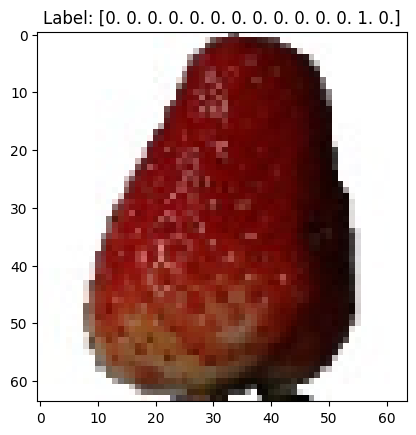

In [24]:
# prompt: plot 1st image from test set
# Assuming validation_generator is defined as in the provided code.
images, labels = next(test_generator)

# Plot the first image from the test set
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}") # Assuming labels[0] is the correct label
plt.show()


In [25]:
# Predict the class of the image
prediction = model_4.predict(np.expand_dims(images[0], axis=0)) # Change model accordingly

# Get the index of the predicted class (highest probability)
predicted_class_index = np.argmax(prediction[0])
# Get the index of the actual class
actual_class_index = np.argmax(labels[0])

# Print the prediction and actual label
print(f"Predicted class index: {predicted_class_index}")
print(f"Actual class index: {actual_class_index}")


# Compare prediction to actual label
if predicted_class_index == actual_class_index:
    print("Prediction is correct.")
else:
    print("Prediction is incorrect.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class index: 12
Actual class index: 12
Prediction is correct.


Found 663 images belonging to 14 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


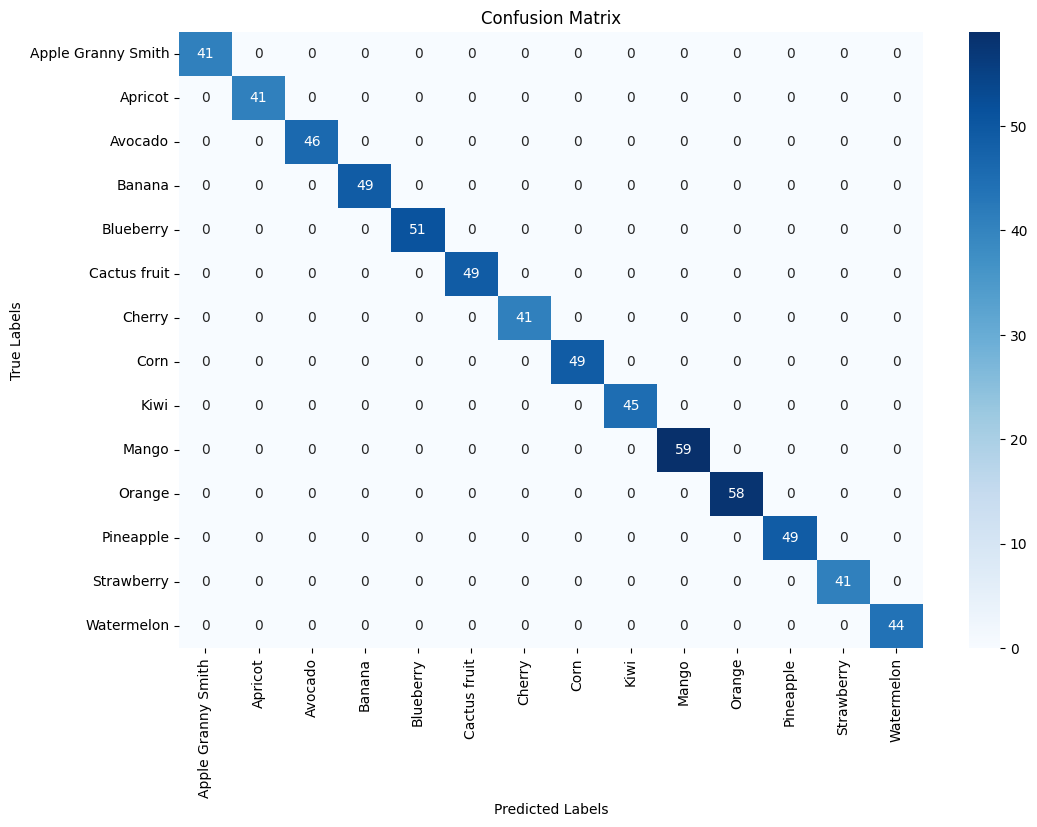

Classification Report:
                    precision    recall  f1-score   support

Apple Granny Smith       1.00      1.00      1.00        41
           Apricot       1.00      1.00      1.00        41
           Avocado       1.00      1.00      1.00        46
            Banana       1.00      1.00      1.00        49
         Blueberry       1.00      1.00      1.00        51
      Cactus fruit       1.00      1.00      1.00        49
            Cherry       1.00      1.00      1.00        41
              Corn       1.00      1.00      1.00        49
              Kiwi       1.00      1.00      1.00        45
             Mango       1.00      1.00      1.00        59
            Orange       1.00      1.00      1.00        58
         Pineapple       1.00      1.00      1.00        49
        Strawberry       1.00      1.00      1.00        41
        Watermelon       1.00      1.00      1.00        44

          accuracy                           1.00       663
         macro 

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Create a new test_generator for evaluation with shuffle=False to ensure order consistency
# Using the existing test_datagen which has rescale=1/255.0
test_generator_for_eval = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    test_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=b_size,
    class_mode='categorical',
    shuffle=False # Crucial for getting y_true and y_pred in correct order
)

# Get true labels
y_true = test_generator_for_eval.classes

# Get predictions
predictions = model_4.predict(test_generator_for_eval)
y_pred = np.argmax(predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(test_generator_for_eval.class_indices.keys()) # Use the class_indices from the evaluation generator

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Display Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))
